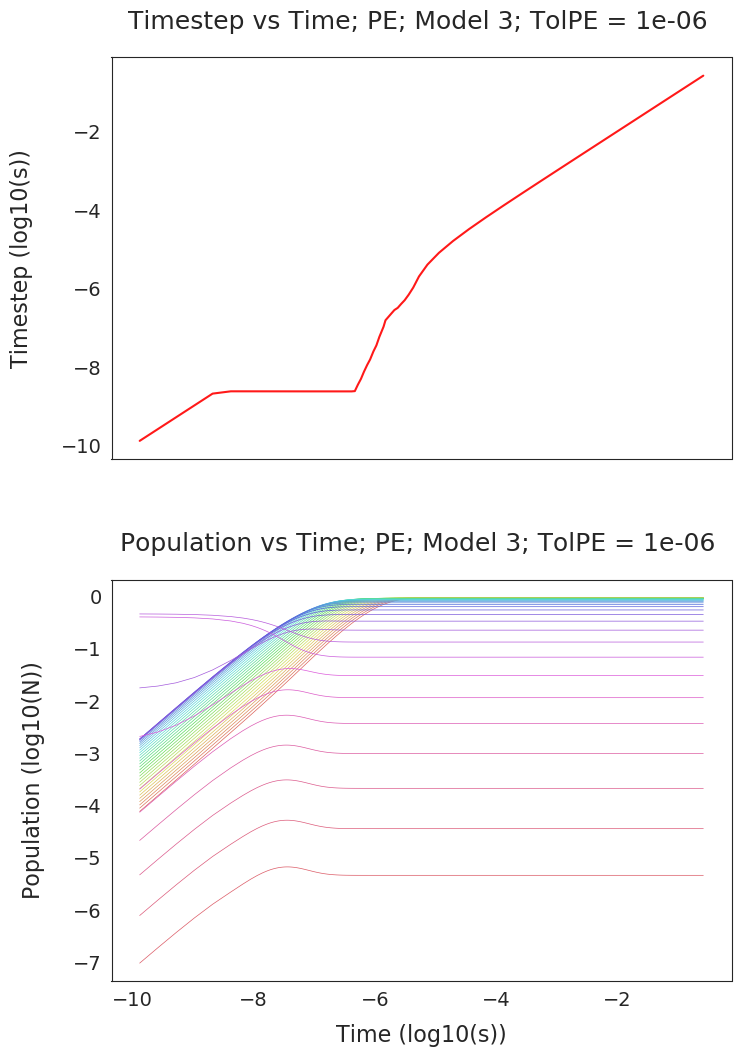

In [14]:
# Plotting and Graphics Package
# This package is designed to facilitate the visualization of data by creating plots of timestep versus time and population values.
# It provides the flexibility to customize various parameters such as plot file numbers and titles according to specific requirements.
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import ScalarFormatter

#Parameters
n_plotfiles = 109 #Enter the number of plotfiles you have
scheme = "PE" #Enter the scheme you are testing
model_number = "3" #Enter the model you are using (1, 3, or 5)



# Set the directory where the plotfiles are located
file_dir = "/home/jared/NeutrinoTransportTesting/OutputC"

# Initialize empty lists to store the t and dt values, N values
t_values = []
dt_values = []
N_values = []

# Loop over each plotfile, change based on nplotfiles
for i in range(n_plotfiles):
    # Construct the filename
    filename = os.path.join(file_dir, f"PlotFile_{i}")
    # Open the file and extract the dt, t, and N values
    with open(filename, "r") as f:
        N = []
        for line in f:
            if line.startswith("t:"):
                t = float(line.split(":")[1])
            if line.startswith("tolPE:"):            
                tolPE = float(line.split(":")[1])
            if line.startswith("dt_grow:"):          
                dt_grow = float(line.split(":")[1])    
            elif line.startswith("dt:"):
                dt = float(line.split(": ")[1])
            elif line.startswith("N:"):
                N_line = line.split(": ")[1].strip()
                N.append(np.array([float(x) for x in N_line.split()]))
                
    # Append the t, dt, and N values to the lists
    t_values.append(t)
    dt_values.append(dt)
    N_values.append(N)
    
# Convert the lists to NumPy arrays
t_array = np.array(t_values)
dt_array = np.array(dt_values)
N_array = np.array(N_values)

# Apply log10 to the relevant arrays
t_log_array = np.log10(t_array)
dt_log_array = np.log10(dt_array)
N_log_array = np.log10(N_array)

# Set up the subplots sharing the same x-axis
sns.set_style("white")
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 12), sharex=True)

# Plot dt vs t on the first subplot
ax1.plot(t_log_array[1:], dt_log_array[1:], c="red", alpha=0.9, linewidth=1.5, zorder=2)
ax1.set_ylabel("Timestep (log10(s))", fontsize=16, labelpad=20)
ax1.tick_params(axis='both', which='major', labelsize=14)

# Plot N vs t on the second subplot
palette = sns.color_palette("hls", n_colors=N_log_array.shape[2])
colors = list(palette.as_hex())
for i in range(N_log_array.shape[2]):
    ax2.plot(t_log_array[1:], N_log_array[1:, :, i], c=colors[i], alpha=0.98, linewidth=0.5, zorder=2)
ax2.set_xlabel("Time (log10(s))", fontsize=16, labelpad=10)
ax2.set_ylabel("Population (log10(N))", fontsize=16, labelpad=20)
ax2.tick_params(axis='both', which='major', labelsize=14)

# Add titles
ax1.set_title(f"Timestep vs Time; {scheme}; Model {model_number}; TolPE = {tolPE} ", fontsize=18, y=1.05)
ax2.set_title(f"Population vs Time; {scheme}; Model {model_number}; TolPE = {tolPE} ", fontsize=18, y=1.05)

# Adjust the space between the subplots
fig.subplots_adjust(hspace=0.3)

# Save the plot to a file
plt.savefig(f"CPU_{scheme}_Model_{model_number}_TimestepVS.Time_&_PopVS.Time.", dpi=300, bbox_inches="tight")

plt.show()

C:\Users\ryste\OneDrive\Desktop\FENN
